# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [327]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# metode
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [328]:
#import dataset
df = pd.read_csv("Live.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [329]:
# lihat data dalam bentuk shape total baris, kolam
df.shape

(7050, 16)

In [330]:
# cek lihat data atas
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [331]:
# Memahami Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [332]:
# melihat jumlah baris dan kolom
jumlahBarisKolom = df.shape
print(f"jumlah Baris Dan Kolom Data {jumlahBarisKolom}")

jumlah Baris Dan Kolom Data (7050, 16)


In [333]:
# Cek Data yang Hilang (Missing value)
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [334]:
# explore kolom status_id
print(df['status_id'].unique())

# explore kolom status_published
print(df['status_published'].unique()) #date

['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']


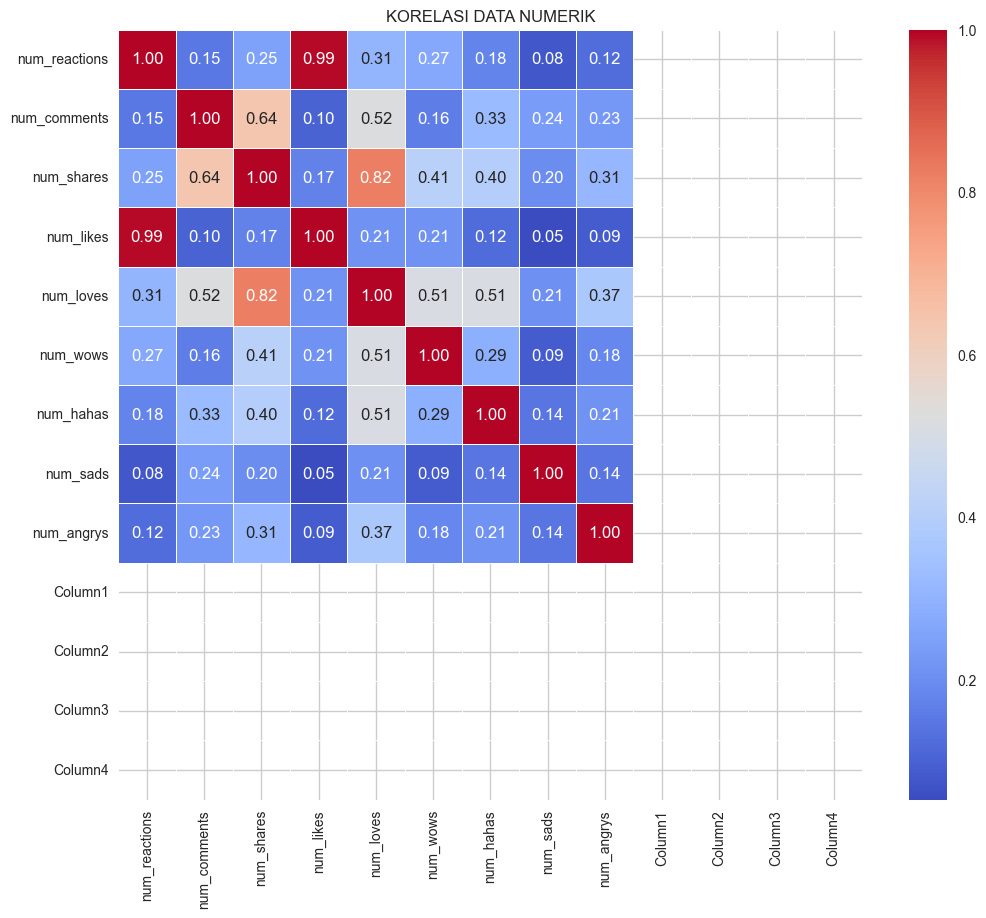

In [335]:
# Analisis Distribusi dan Korelasi
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
corelasi = num_features.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("KORELASI DATA NUMERIK")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1480\922608287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['status_type'], palette='viridis')


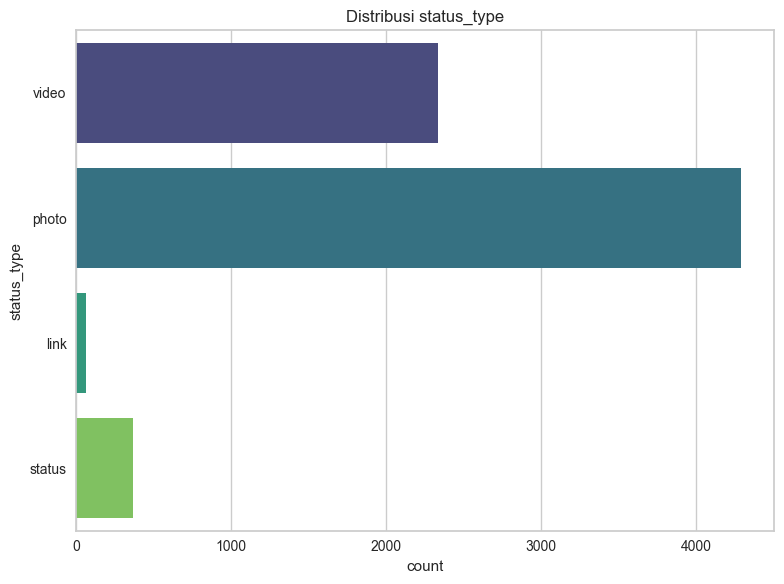

In [336]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df['status_type'], palette='viridis')
plt.title('Distribusi status_type')
plt.tight_layout()
plt.show()

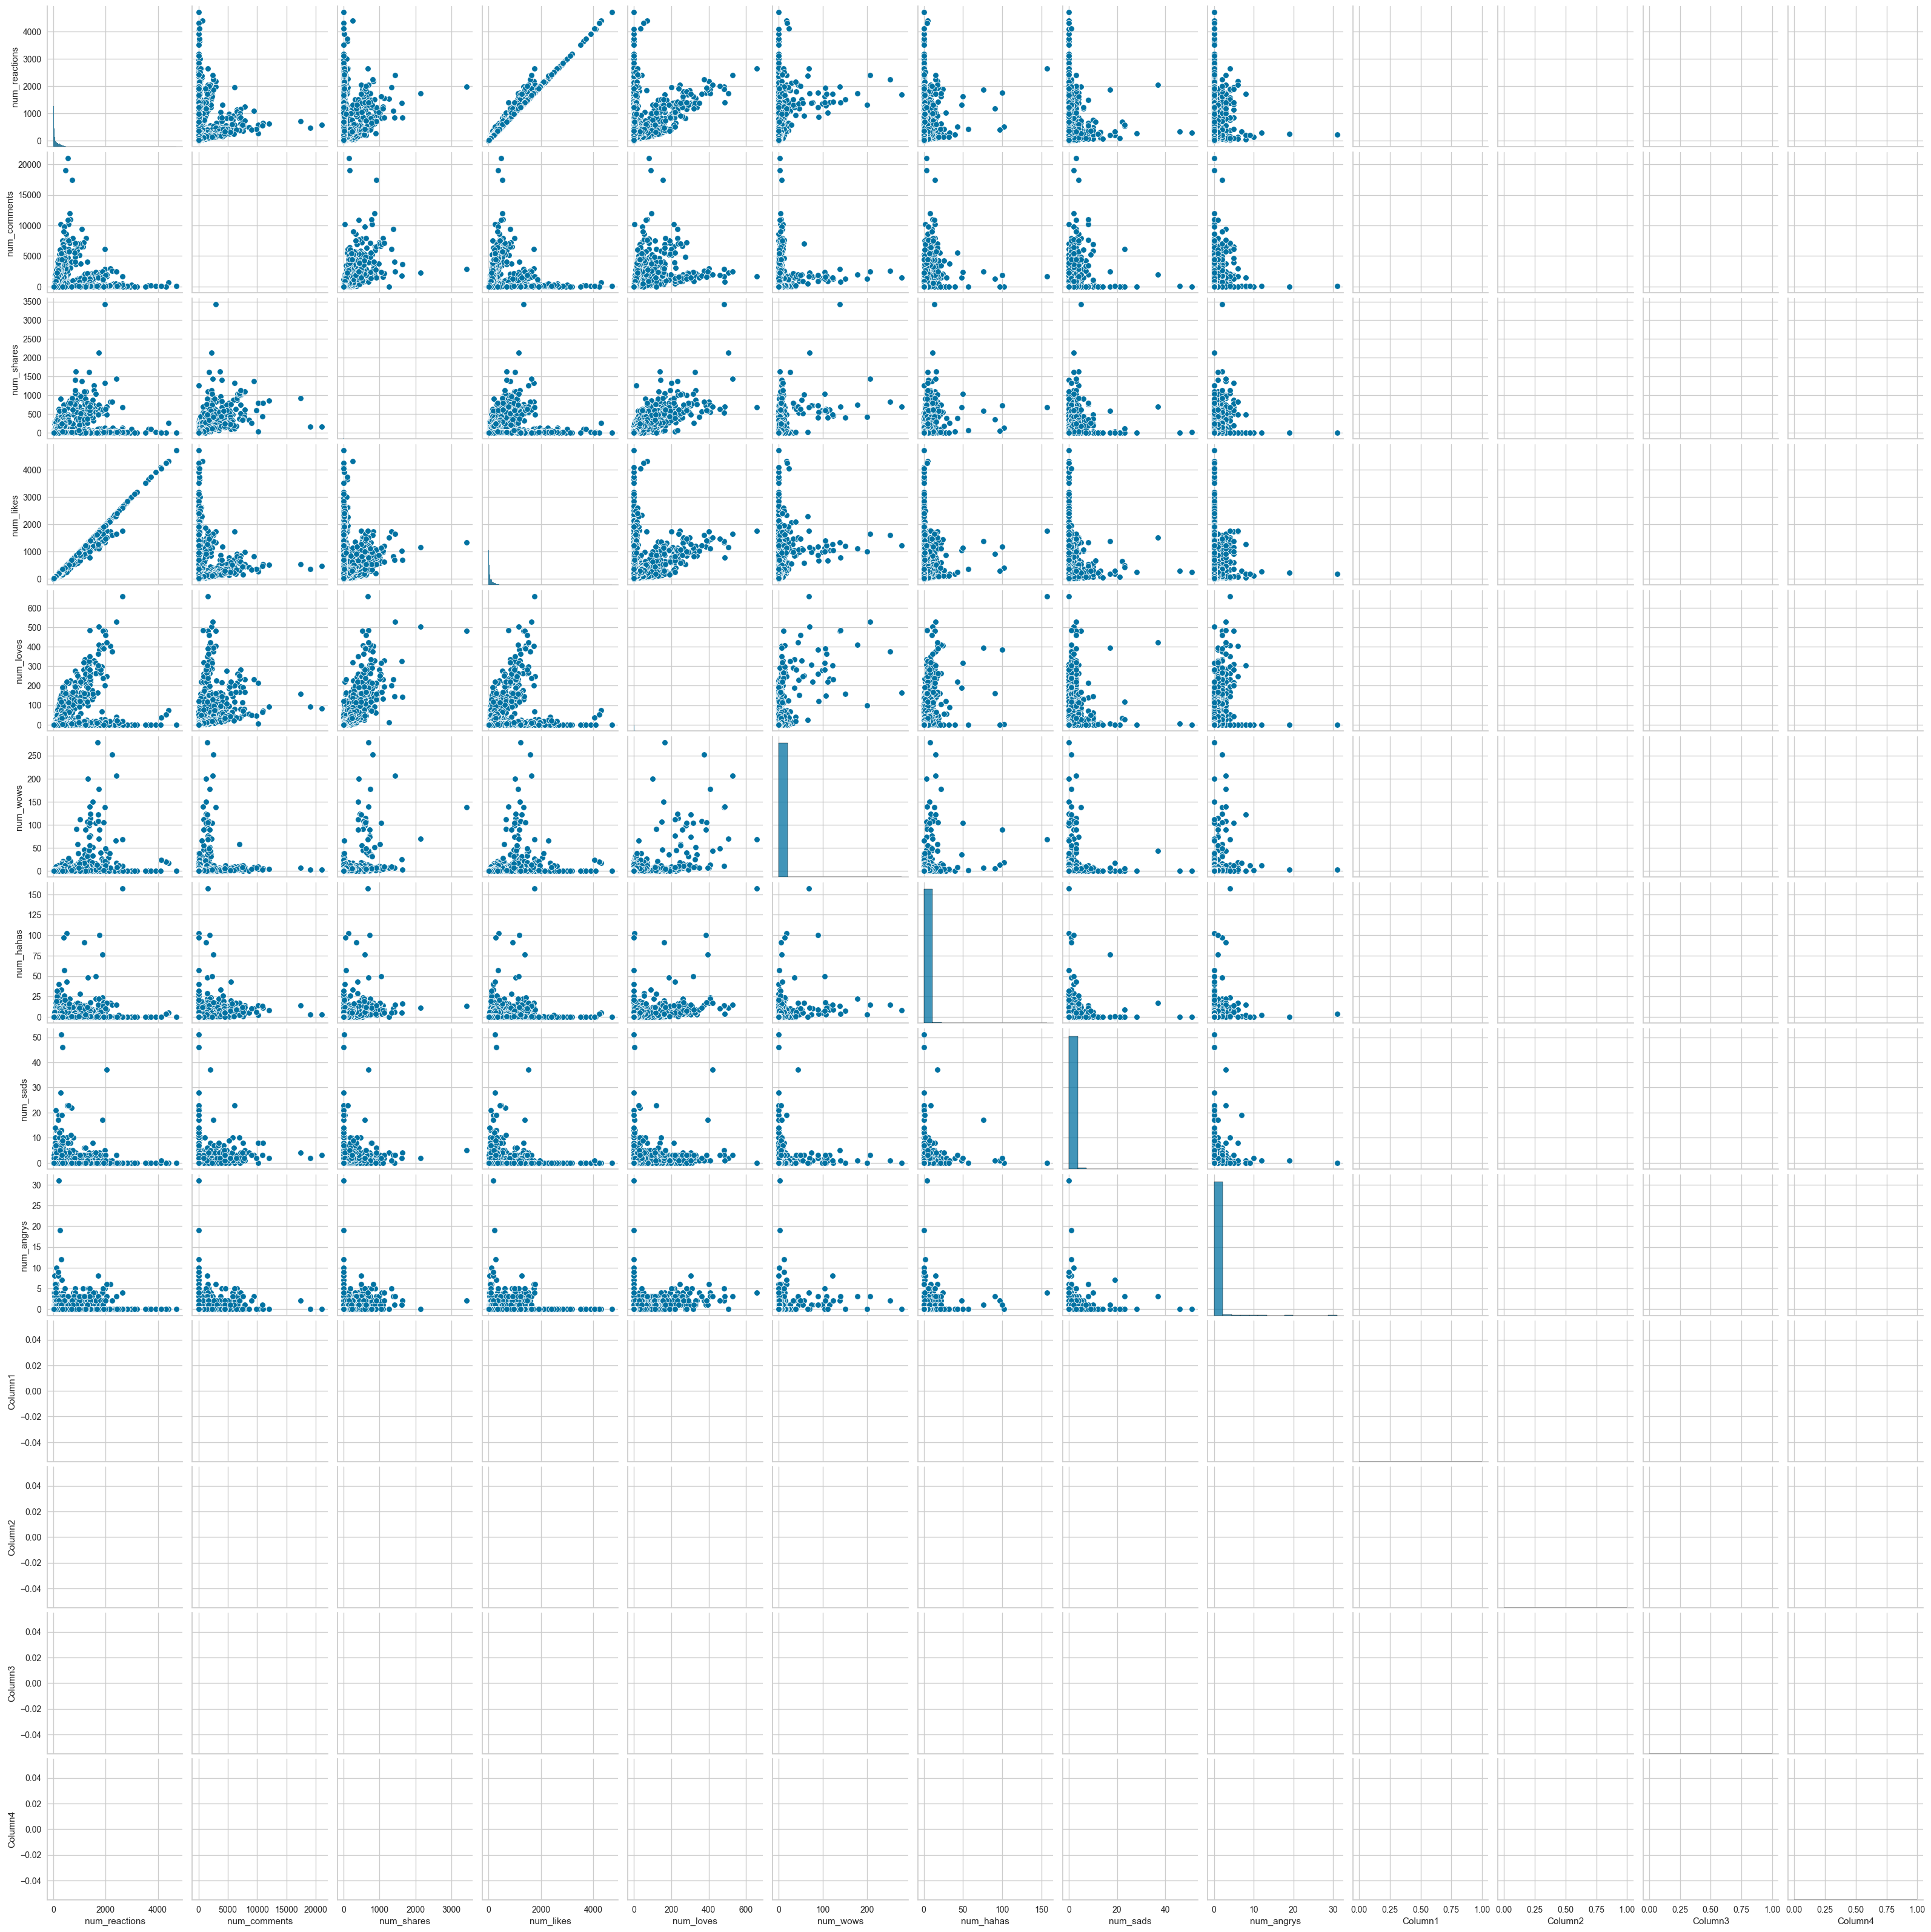

In [337]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [338]:
# hapus kolom yang kosong
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [339]:
# hapus status_id
# hapus status_published

df.drop(['status_id'], axis=1, inplace=True)
df.drop(['status_published'], axis=1, inplace=True)

In [340]:
# banyaknya angka 0 hapus num_angrys, num_sads, num_hahas, 
df.drop(['num_angrys'], axis=1, inplace=True)
df.drop(['num_sads'], axis=1, inplace=True)
df.drop(['num_hahas'], axis=1, inplace=True)
df.drop(['num_wows'], axis=1, inplace=True)

In [341]:
# cek lagi info perubahan yang sudah dilakukan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 330.6+ KB


In [342]:
# melakukan label encoding pada status type
label_encoder = LabelEncoder()

df['status_type'] = label_encoder.fit_transform(df['status_type'])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves
0,3,529,512,262,432,92
1,1,150,0,0,150,0
2,3,227,236,57,204,21
3,1,111,0,0,111,0
4,1,213,0,0,204,9


In [343]:
# rubah feature scaling
kolom = df.columns

In [344]:
# scaling dengan minmax scaler
scale_MM = MinMaxScaler()

df = scale_MM.fit_transform(df)

In [345]:
# cetak berupa dataframe
df = pd.DataFrame(df, columns=[kolom])

In [346]:
# cek lagi
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699


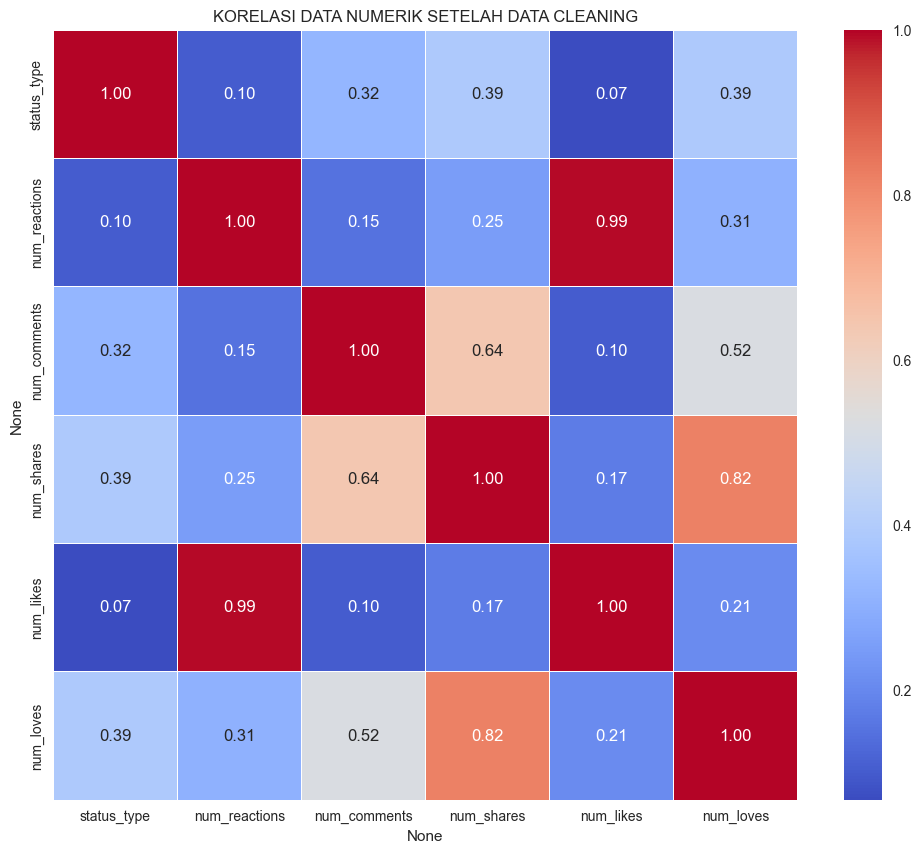

In [347]:
# Analisis Distribusi dan Korelasi
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
corelasi = num_features.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("KORELASI DATA NUMERIK SETELAH DATA CLEANING")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

K-MEANS

In [348]:
# bangun model dengan kmeans
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(df)

# mendapatkan label
df['cluster'] = kmeans.labels_

# cetak
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[3.50233892e-01 2.04001388e-02 6.74716085e-04 5.26401658e-04
  1.99265406e-02 1.94272359e-03]
 [1.00000000e+00 5.32074218e-02 3.10281501e-02 3.41969728e-02
  4.45043848e-02 5.48944478e-02]
 [4.79919679e-01 3.97403627e-01 3.04146553e-03 4.29990992e-03
  3.96037014e-01 5.25847683e-03]]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

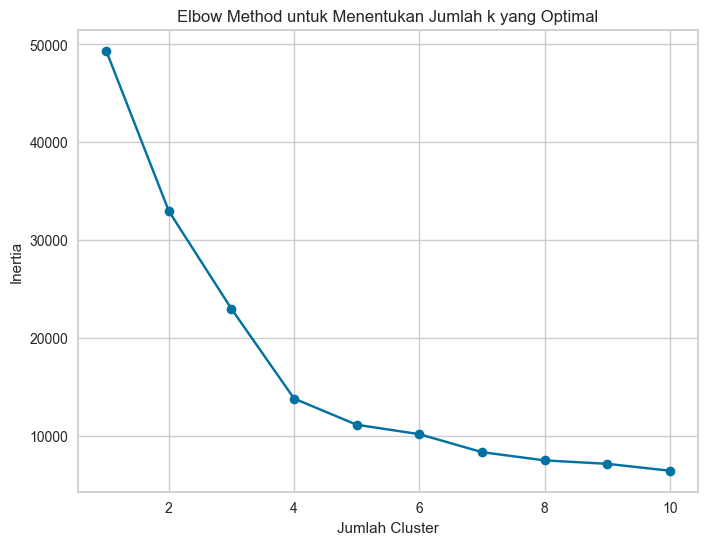

In [349]:
# Langkah 1: Skala Fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Asumsikan df hanya berisi fitur numerik

# Langkah 2: Elbow method untuk mencari jumlah cluster optimal
inertia_values = []
cluster_range = range(1, 11)  # Coba jumlah cluster dari 1 hingga 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Tetapkan random_state untuk reproduksibilitas
    kmeans.fit(df_scaled)  # Melakukan fit pada data yang sudah discale
    inertia_values.append(kmeans.inertia_)

# Langkah 3: Plot grafik inertia
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah k yang Optimal")
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [350]:
# HASIL TERBAIK PADA JUMLAH KLASTER 4
kmeans = KMeans(n_clusters=4, random_state=0)  # Let's assume 2 clusters, change if needed
clusters = kmeans.fit_predict(df)

# Step 4: Get the cluster labels and add them to the DataFrame
df['cluster'] = clusters

# Step 5: Print cluster centers and labels
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

print("\nCluster Labels:")
print(df[['status_type', 'cluster']])


Cluster Centers (Centroids):
[[ 6.66666667e-01  2.78685168e-02  1.03416593e-03  3.54639519e-04
   2.73551714e-02  1.97869102e-03 -3.33066907e-16]
 [ 1.00000000e+00  5.32074218e-02  3.10281501e-02  3.41969728e-02
   4.45043848e-02  5.48944478e-02  1.00000000e+00]
 [ 4.79919679e-01  3.97403627e-01  3.04146553e-03  4.29990992e-03
   3.96037014e-01  5.25847683e-03  2.00000000e+00]
 [ 3.28822297e-01  1.98947870e-02  6.50393718e-04  5.38024035e-04
   1.94238783e-02  1.94028983e-03  1.72084569e-15]]

Cluster Labels:
     status_type cluster
0       1.000000       1
1       0.333333       3
2       1.000000       1
3       0.333333       3
4       0.333333       3
...          ...     ...
7045    0.333333       3
7046    0.333333       3
7047    0.333333       3
7048    0.333333       3
7049    0.333333       3

[7050 rows x 2 columns]


In [351]:
# HASIL silhouette score pada hasil terbaik elbow
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9124223168730721


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [352]:
#TIDAK ADA (-)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

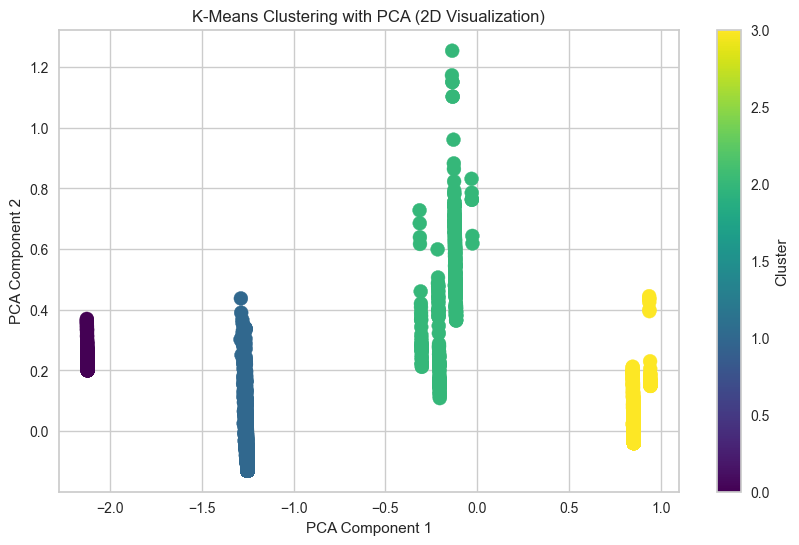

In [353]:
# Dimensi dengan PCA untuk Visualisasi 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

# Plot Scatter Plot Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=100)
plt.title('K-Means Clustering with PCA (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

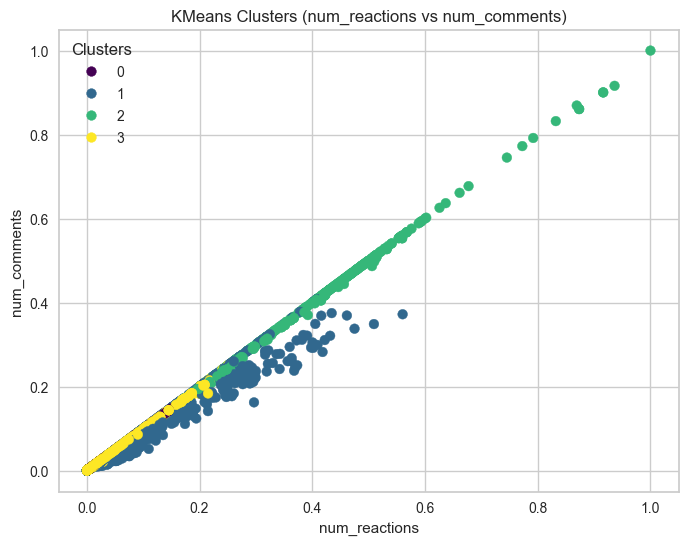

In [354]:
# contoh saja VISUALISASI CLUSTERING antara kolom num reaction vs num likes

# Visualisasi Clustering dengan menambahkan legenda berdasarkan cluster
plt.figure(figsize=(8, 6))

# Plotting scatter dengan warna berdasarkan nilai cluster
scatter = plt.scatter(df['num_reactions'], df['num_likes'], c=df['cluster'], cmap='viridis')

# Menambahkan judul dan label sumbu
plt.title("KMeans Clusters (num_reactions vs num_comments)")
plt.xlabel('num_reactions')
plt.ylabel('num_comments')

# Menambahkan legenda untuk menunjukkan nomor cluster
plt.legend(*scatter.legend_elements(), title="Clusters")

# Menampilkan plot
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [355]:
#cetak semua data contoh 5 paling atas
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,cluster
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,1
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,3
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,1
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,3
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,3


ulis hasil interpretasinya di sini.
1. Cluster 1: analisis hasil pada cluster 1 bagian kolom status type berisikan "status" dengan rata-rata jumlah banyaknya yang menyukai konten dengan tipe status 128.84 pada data asli yang sudah dieskpor.
2. Cluster 2: analisis hasil pada cluster 2 bagian kolom status type berisikan "video" dengan rata-rata jumlah banyaknya yang menyukai konten dengan tipe video 209.62 pada data asli yang sudah dieskpor.
3. Cluster 3: analisis hasil pada cluster 3 bagian kolom status type berisikan "photo dan status" berisikan rata-rata campuran dengan jumlah banyaknya yang menyukai konten dengan tipe campuran 1865.33 pada data asli yang sudah dieskpor. dimana dengan status atau konten ini yang paling banyak disukai.
4. Cluster 4: analisis hasil pada cluster 4 bagian kolom status type berisikan "photo" dengan rata-rata jumlah banyaknya yang menyukai konten dengan tipe photo 91.55 pada data asli yang sudah dieskpor. dimana konten ini paling sedikit di sukai, namun masih ada yang menyukainya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [356]:
df.to_csv('hasil_cluster.csv', index=False)